# Question No.1. Vision Dataset

CIFAR-10-It dataset consists of 60000 32x32 colour images in 10 classes. Please find your dataset from the link-https://www.tensorflow.org/datasets/catalog/cifar10

## 1. Import Libraries/Dataset(0 mark)

In [1]:
import os
seed=21
os.environ['PYTHONHASHSEED']=str(seed)

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import pandas as pd
import itertools
import copy
import time


In [2]:
def reset_random_seeds(seed_val):
    os.environ['PYTHONHASHSEED']=str(seed_val)
    tf.random.set_seed(seed_val)
    np.random.seed(seed_val)

In [3]:
reset_random_seeds(seed)

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
num_classes = 10
print(num_classes)



10


In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

## 2. Data Visualization and augmentation(1 mark)

### a. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [6]:
def display_image(sample_image):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

    plt.figure(figsize=(5,20))
    # fig, ax = plt.subplots(nrows=10, ncols=2)
    j=1
    for key, value in sample_image.items():
        for i in range(len(value)):
            plt.subplot(10, len(value), j)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(value[i]/255, cmap=plt.cm.binary)
            plt.xlabel(class_names[key])
            j+=1
    plt.show()

In [7]:
sample_image = {}

for image, label in zip(X_train, y_train):
    if label[0] in sample_image.keys() and len(sample_image[label[0]])<2:
        sample_image[label[0]].append(image)
    elif label[0] not in sample_image.keys():
        sample_image[label[0]] = [image]
    

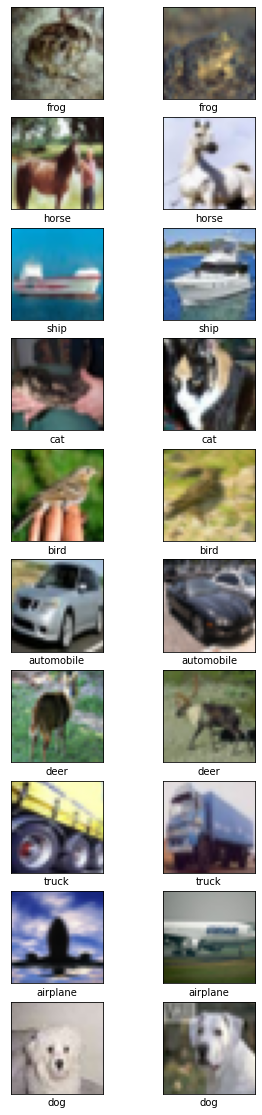

In [8]:
display_image(sample_image)

### b. Apply horizontal flip and width shift augmentation (horizontal_flip, width_shift_range) to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

In [9]:
width_shift_range_gen = ImageDataGenerator(
    width_shift_range=0.2
)

In [10]:
horizontal_flip_gen = ImageDataGenerator(
    horizontal_flip=True
)

In [11]:
width_shift_range_gen.fit(X_train)
horizontal_flip_gen.fit(X_train)

In [12]:
def get_aug_img(image, gen):
    return next(gen.flow(np.array([image])))[0]
    

##############################################
      wide_shift_tange augmentation           
##############################################


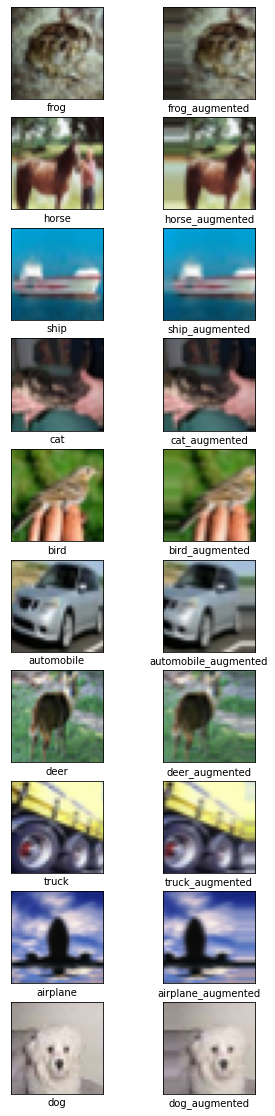

In [13]:
print("##############################################")
print("      wide_shift_tange augmentation           ")
print("##############################################")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,20))
# fig, ax = plt.subplots(nrows=10, ncols=2)
j=1
for key, value in sample_image.items():
    value[1] = get_aug_img(value[0], width_shift_range_gen)
    for i in range(len(value)):
        plt.subplot(10, len(value), j)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(value[i]/255, cmap=plt.cm.binary)
        if j%2==1:
            plt.xlabel(class_names[key])
        else:
            plt.xlabel(class_names[key]+'_augmented')
        j+=1
plt.show()
      
    

##############################################
      Horizontal Flip augmentation           
##############################################


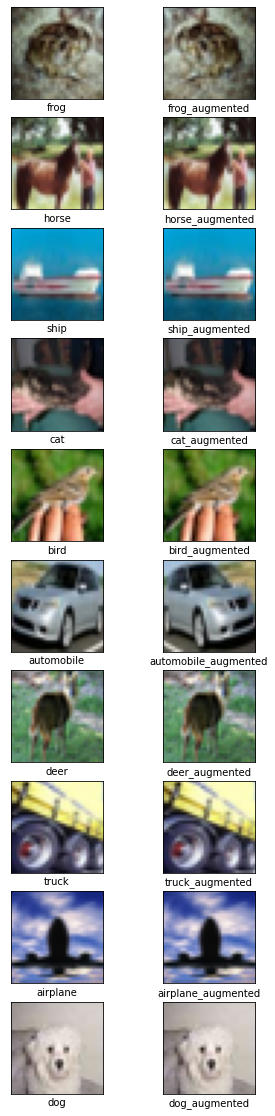

In [14]:
print("##############################################")
print("      Horizontal Flip augmentation           ")
print("##############################################")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,20))
# fig, ax = plt.subplots(nrows=10, ncols=2)
j=1
for key, value in sample_image.items():
    value[1] = get_aug_img(value[0], horizontal_flip_gen)
    for i in range(len(value)):
        plt.subplot(10, len(value), j)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(value[i]/255, cmap=plt.cm.binary)
        if j%2==1:
            plt.xlabel(class_names[key])
        else:
            plt.xlabel(class_names[key]+'_augmented')
        j+=1
plt.show()
      
    

In [15]:
generator = ImageDataGenerator(
    width_shift_range=0.1,
    horizontal_flip=True,
    samplewise_std_normalization=True 
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [16]:
generator.fit(X_train)

### c. Bring the train and test data in the required format.

In [17]:
y_train = utils.to_categorical(y_train, num_classes)
y_valid = utils.to_categorical(y_valid, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

### d. Print the shapes of train and test data.

In [18]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (40000, 32, 32, 3)
y_train shape:  (40000, 10)


In [19]:
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_train.shape)

X_test shape:  (10000, 32, 32, 3)
y_test shape:  (40000, 10)


## 3. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.<ul><li>The total number of hidden units chosen was experimenting multiple times. We initially started using 512 unit hidden layer, and started adding new hidden layers by halving the number of neurons in each layer. We constructed the deepnet by adding new hidden layer until we reached overfitting point. Then forward we tried to prevent overfitting by varying regularization parameters and reducing the number of layers when ever necessary</li></ul></li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.<ul><li>The speciality of deep learning is that it minimizes the necessity for handcrafter features. This is achieved by using deep neural networks where each layer tries to learn different feature. The last layer in general tries to act as a classifier. This is the same moto behind the subject behind Respresentational learning. The penultimate leayer in general spits out the learbt feature vector which is used by the last layer to classify. In order to make sure the classifier or last layer generalizes well, we added the dropout layer after the penultimate layer. This will ensure that the features recieved by classifier will be introduced with additional noise thus helping in generalization of the last layer. In general, it is always goog to have dropout after every layer that uses non-linear activation function to prebent overfitting, but since the ask is for using only 1, we have placed it at the current position.</li></ul></li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [87]:
epochs = 30
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 64
dropout_rate = 0.3
num_classes = 10

In [88]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dropout(dropout_rate))
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.linear, kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
layers.append(tf.keras.layers.Softmax())
model = tf.keras.Sequential(layers)

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 16)               

## 4. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.<ul><li>We intially choose 0.001(least possible) and use learning rate decay to reduce it for every 10000 steps taken. This helps us converge to optimum better.</li></ul></li>
<li>Use accuracy as a metric.</li>
</ol>

In [90]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule, amsgrad=False), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## 5. Model Training(0.5 + 0.25 = 0.75 mark)

### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [91]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model.fit(train_gen,epochs=100,validation_data=valid_gen, callbacks=[callback])
end_time = time.time()

Epoch 1/100
625/625 [==============================] - 23s 37ms/step - loss: 2.2401 - accuracy: 0.2435 - val_loss: 1.9304 - val_accuracy: 0.3700
Epoch 2/100
625/625 [==============================] - 23s 36ms/step - loss: 1.9787 - accuracy: 0.3428 - val_loss: 1.8004 - val_accuracy: 0.4151
Epoch 3/100
625/625 [==============================] - 23s 36ms/step - loss: 1.8703 - accuracy: 0.3810 - val_loss: 1.7558 - val_accuracy: 0.4217
Epoch 4/100
625/625 [==============================] - 23s 36ms/step - loss: 1.8069 - accuracy: 0.4109 - val_loss: 1.7184 - val_accuracy: 0.4512
Epoch 5/100
625/625 [==============================] - 23s 36ms/step - loss: 1.7591 - accuracy: 0.4251 - val_loss: 1.6828 - val_accuracy: 0.4660
Epoch 6/100
625/625 [==============================] - 23s 36ms/step - loss: 1.7368 - accuracy: 0.4398 - val_loss: 1.6922 - val_accuracy: 0.4602
Epoch 7/100
625/625 [==============================] - 23s 36ms/step - loss: 1.7153 - accuracy: 0.4523 - val_loss: 1.6473 - val_ac

### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

Text(0, 0.5, 'accuracy')

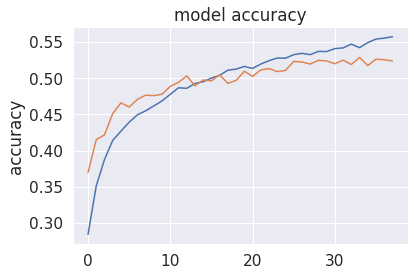

In [92]:
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

In [93]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 864.03s


## 6. Model Evaluation(0.5 + 0.5 = 1 mark)

### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
The model currently has an training accuracy of 

In [94]:
train_predicted = model.predict(train_gen)
valid_predicted = model.predict(valid_gen)

In [95]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [96]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [97]:
print("Train Accuracy: {}%".format(round(accuracy_score(train_actual_cls, train_predicted_cls)*100.0, 2)))
print("Validation Accuracy: {}%".format(round(accuracy_score(valid_actual_cls, valid_predicted_cls)*100.0,2)))

Train Accuracy: 59.14%
Validation Accuracy: 52.19%


In [98]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls, normalize='true')

In [99]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

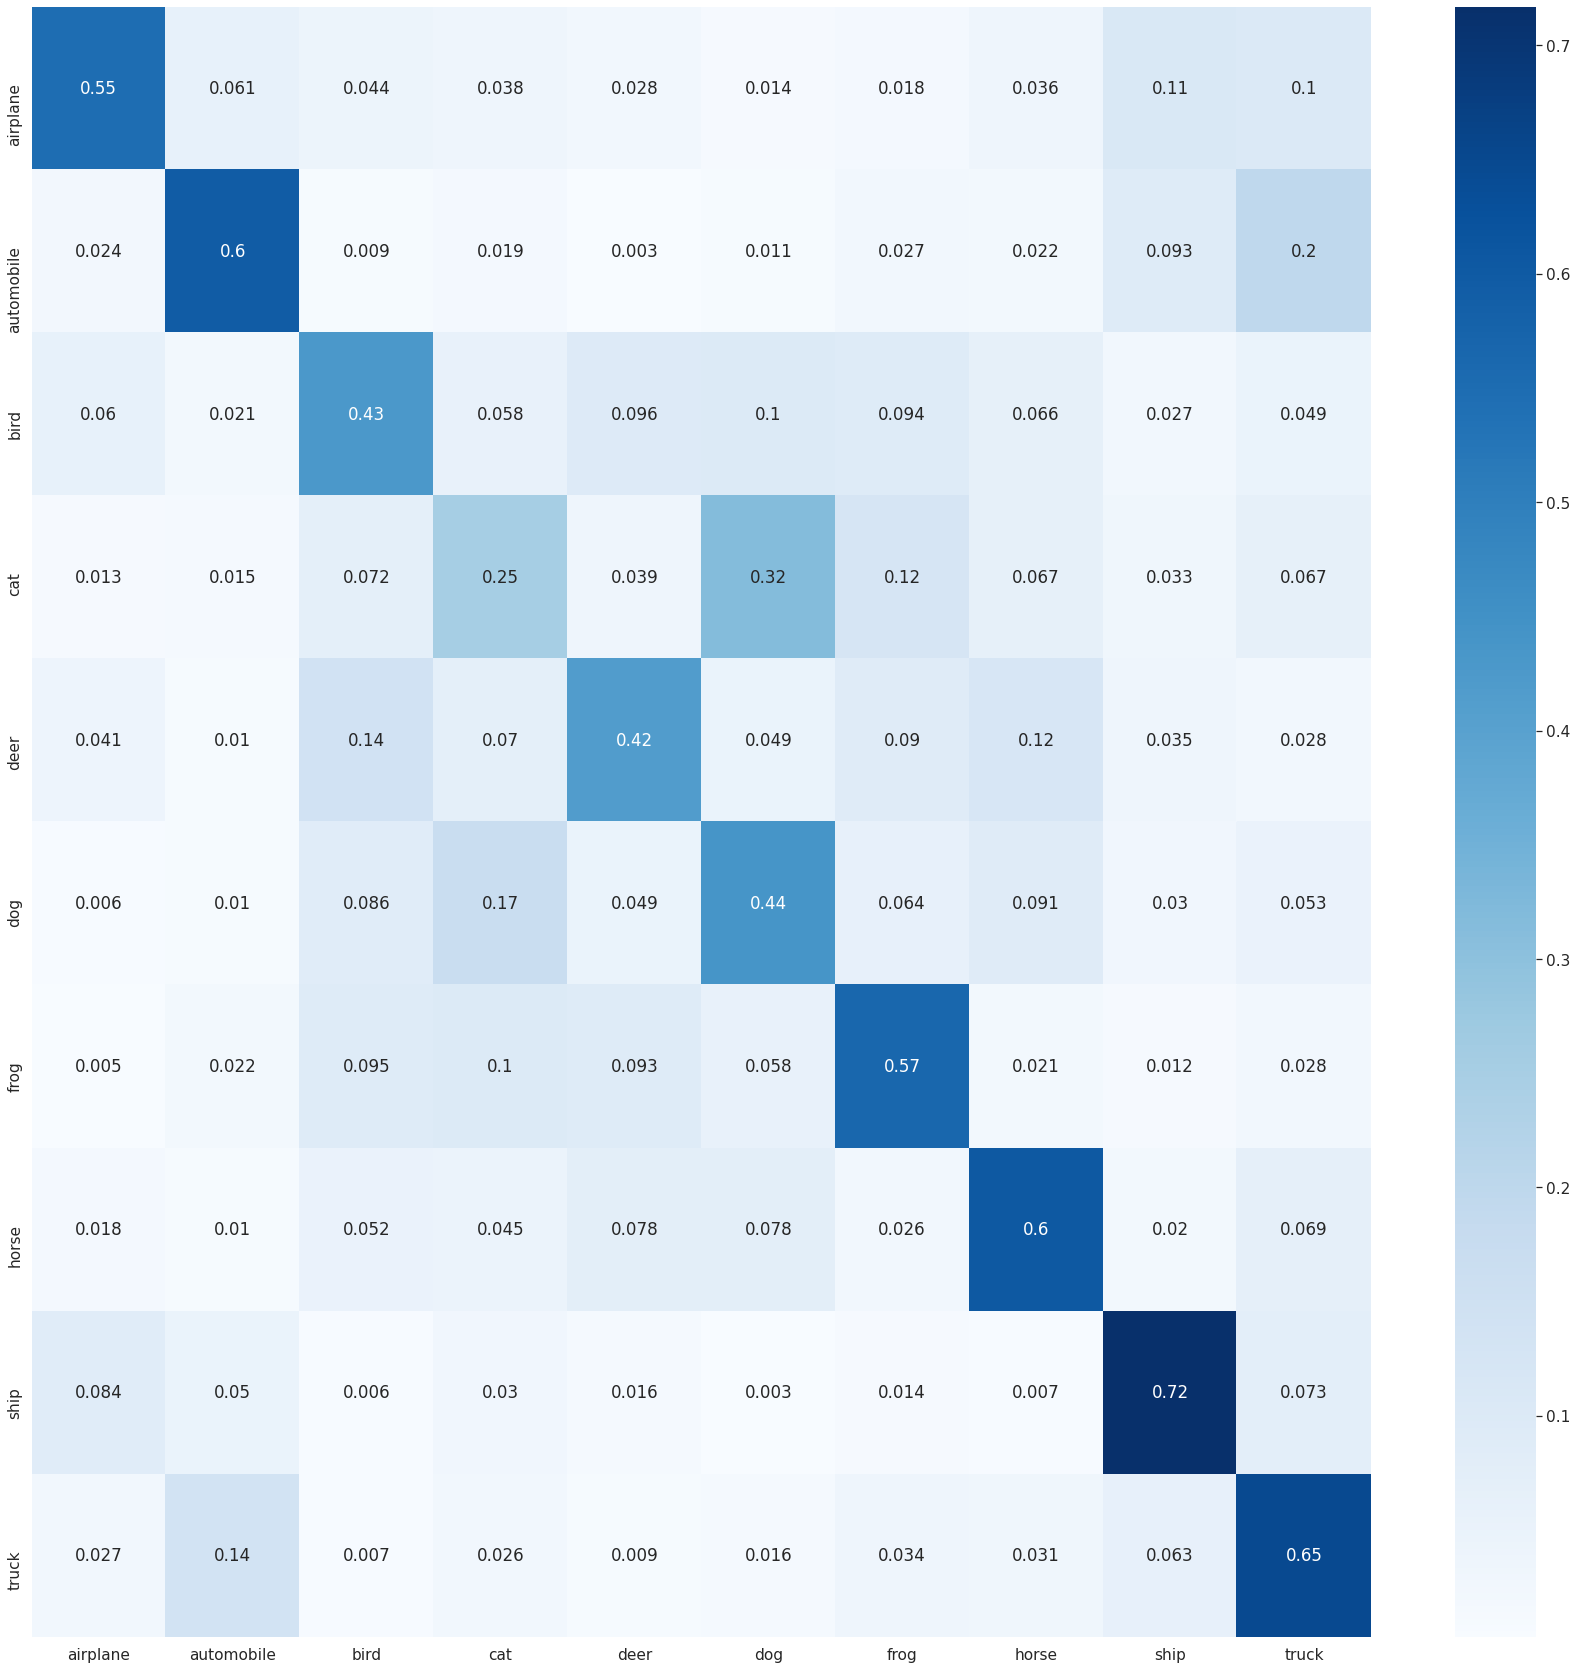

In [100]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

### Analysis of the heatmap
The best classified class is the ship class, where amongst the ship data in validation dataset, ~72% of them were classified correctly. The worst performing class is the cat class with ~25% of cat images in validation dataset being classified correctly, ~32% of cat images are being misclassifed as dogs!

### b. Print the two most incorrectly classified images for each class in the test dataset.

In [34]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [35]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [36]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


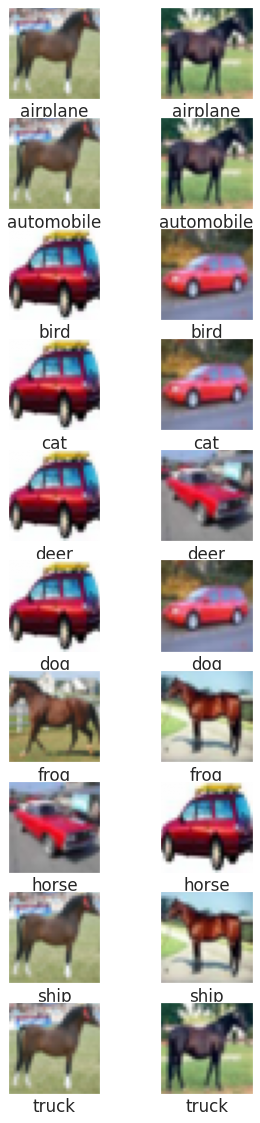

In [37]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# Hyperparameter Tuning 
Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. <strong>(1 + 1 = 2 marks)</strong>

## 1. Batch Size: Change the value of batch size in model training

We will change the batch_size parameter and run the same again. For the change we will double the batch_size and analyze what's happening

### 1. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.<ul><li>The total number of hidden units chosen was experimenting multiple times. We initially started using 512 unit hidden layer, and started adding new hidden layers by halving the number of neurons in each layer. We constructed the deepnet by adding new hidden layer until we reached overfitting point. Then forward we tried to prevent overfitting by varying regularization parameters and reducing the number of layers when ever necessary</li></ul></li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.<ul><li>The speciality of deep learning is that it minimizes the necessity for handcrafter features. This is achieved by using deep neural networks where each layer tries to learn different feature. The last layer in general tries to act as a classifier. This is the same moto behind the subject behind Respresentational learning. The penultimate leayer in general spits out the learbt feature vector which is used by the last layer to classify. In order to make sure the classifier or last layer generalizes well, we added the dropout layer after the penultimate layer. This will ensure that the features recieved by classifier will be introduced with additional noise thus helping in generalization of the last layer. In general, it is always goog to have dropout after every layer that uses non-linear activation function to prebent overfitting, but since the ask is for using only 1, we have placed it at the current position.</li></ul></li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [101]:
epochs = 30
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 128 # value changed 
dropout_rate = 0.3
num_classes = 10

In [102]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dropout(dropout_rate))
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model = tf.keras.Sequential(layers)

In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_40 (Dense)             (None, 16)               

### 2. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.<ul><li>We intially choose 0.001(least possible) and use learning rate decay to reduce it for every 10000 steps taken. This helps us converge to optimum better.</li></ul></li>
<li>Use accuracy as a metric.</li>
</ol>

In [104]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### 3. Model Training(0.5 + 0.25 = 0.75 mark)

#### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [105]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model.fit(train_gen,epochs=100,validation_data=valid_gen, shuffle=False, callbacks=[callback])
end_time = time.time()

Epoch 1/100
313/313 [==============================] - 22s 69ms/step - loss: 2.2574 - accuracy: 0.2232 - val_loss: 1.9089 - val_accuracy: 0.3884
Epoch 2/100
313/313 [==============================] - 21s 69ms/step - loss: 1.9824 - accuracy: 0.3465 - val_loss: 1.7775 - val_accuracy: 0.4383
Epoch 3/100
313/313 [==============================] - 22s 69ms/step - loss: 1.8718 - accuracy: 0.3784 - val_loss: 1.7401 - val_accuracy: 0.4354
Epoch 4/100
313/313 [==============================] - 21s 68ms/step - loss: 1.8188 - accuracy: 0.3984 - val_loss: 1.6968 - val_accuracy: 0.4549
Epoch 5/100
313/313 [==============================] - 21s 68ms/step - loss: 1.7590 - accuracy: 0.4240 - val_loss: 1.6685 - val_accuracy: 0.4651
Epoch 6/100
313/313 [==============================] - 22s 69ms/step - loss: 1.7315 - accuracy: 0.4365 - val_loss: 1.6463 - val_accuracy: 0.4735
Epoch 7/100
313/313 [==============================] - 21s 69ms/step - loss: 1.7095 - accuracy: 0.4441 - val_loss: 1.6246 - val_ac

#### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

Text(0, 0.5, 'accuracy')

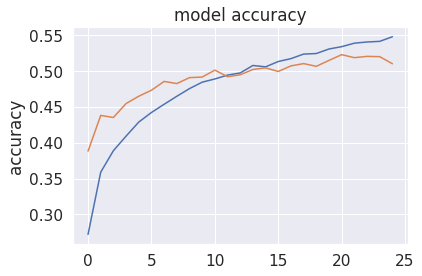

In [106]:
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

In [107]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 541.91s


### 4. Model Evaluation(0.5 + 0.5 = 1 mark)

#### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [108]:
train_predicted = model.predict(train_gen)
valid_predicted = model.predict(valid_gen)

In [109]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [110]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [111]:
print("Train Accuracy: {}%".format(round(accuracy_score(train_actual_cls, train_predicted_cls)*100.0, 2)))
print("Validation Accuracy: {}%".format(round(accuracy_score(valid_actual_cls, valid_predicted_cls)*100.0,2)))

Train Accuracy: 57.09%
Validation Accuracy: 51.37%


In [112]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls, normalize='true')

In [113]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

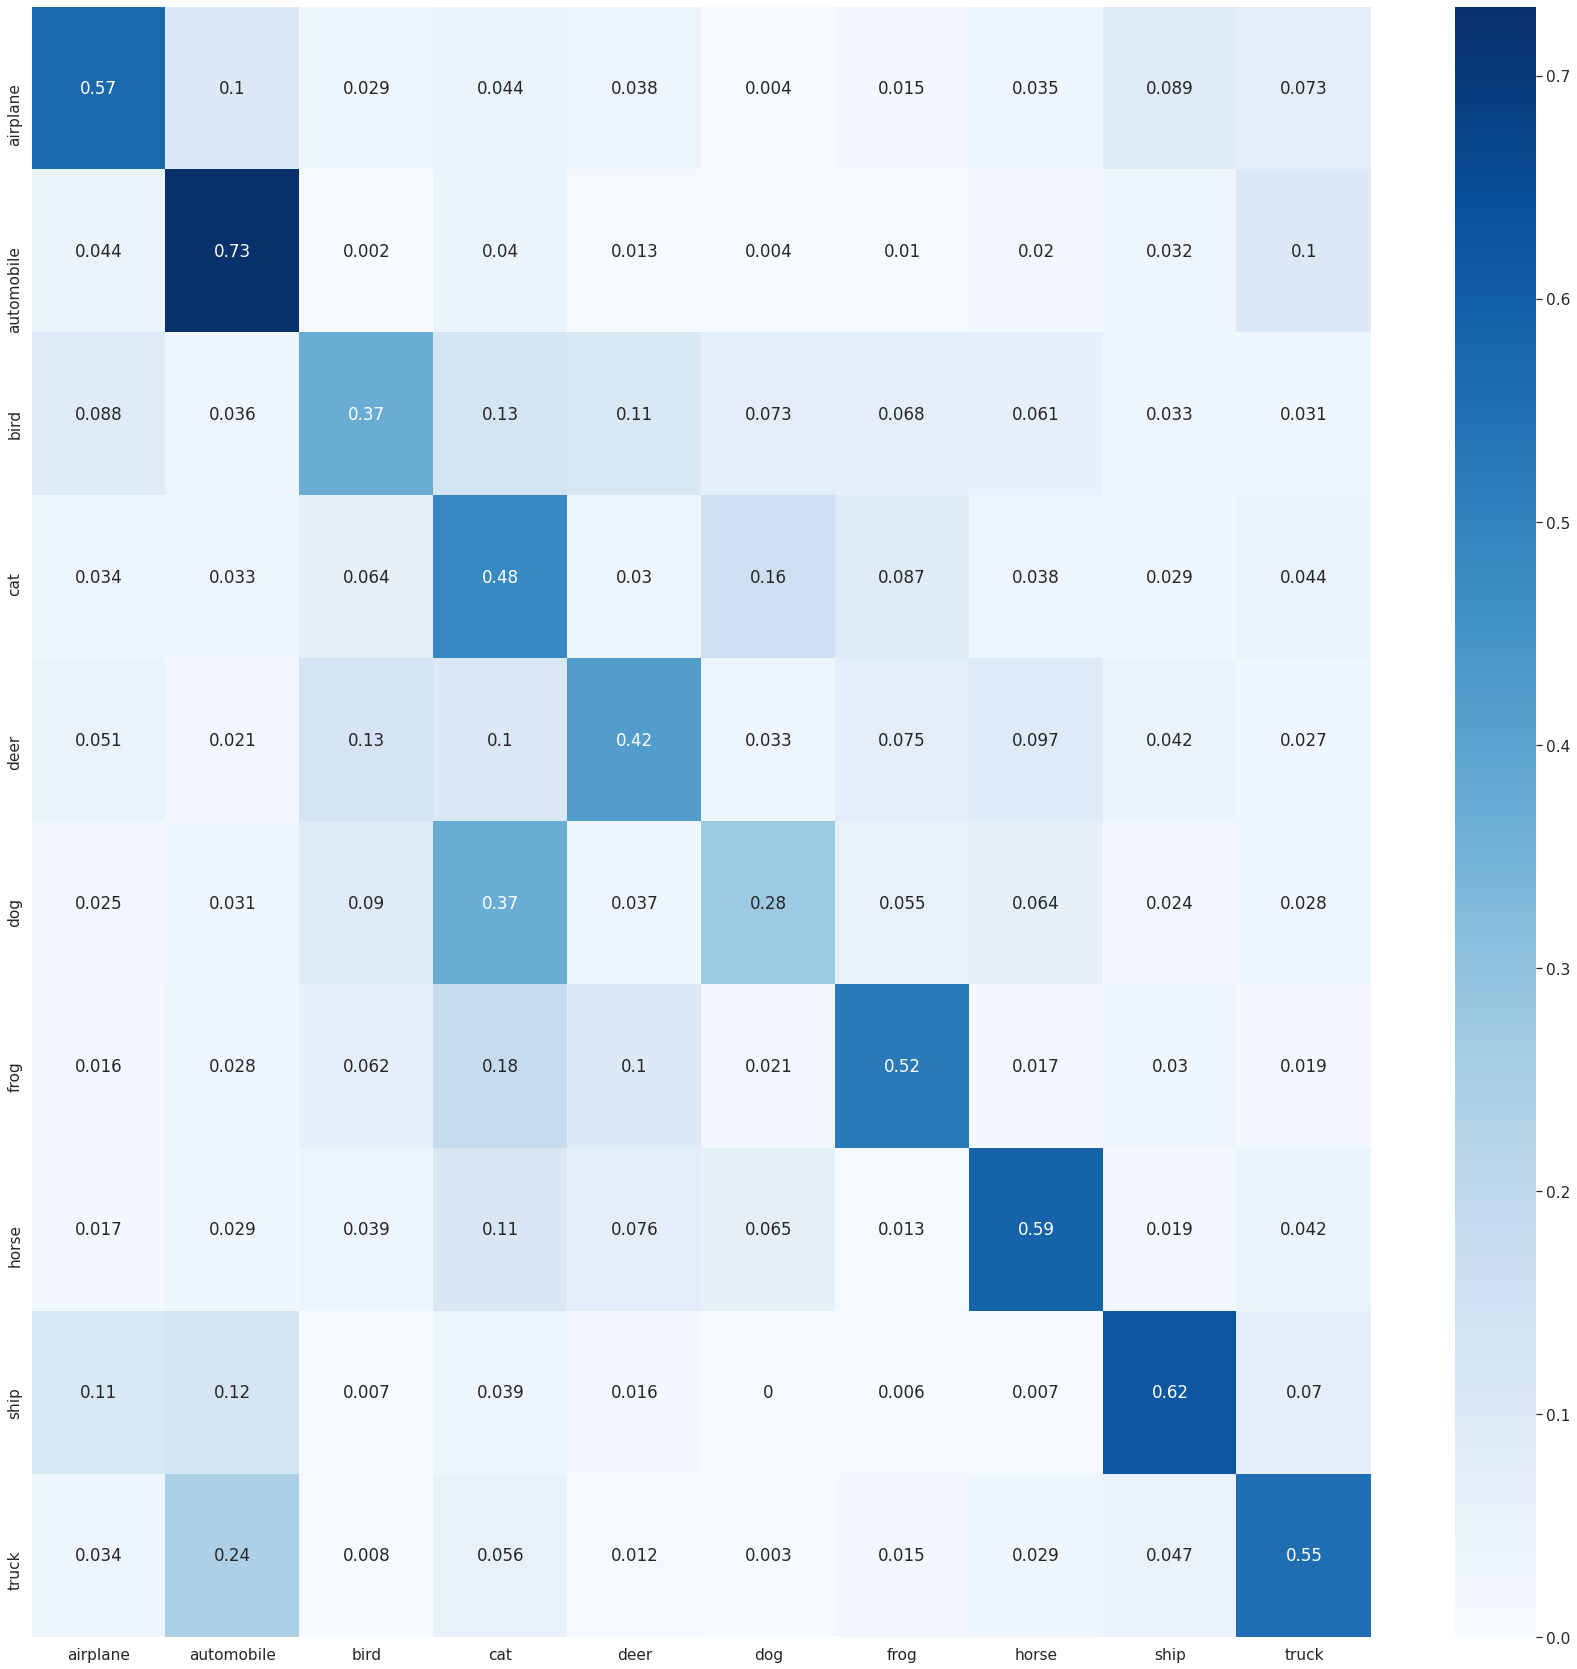

In [114]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

# To do
Analysis of the heatmap

#### b. Print the two most incorrectly classified images for each class in the test dataset.

In [115]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [116]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [117]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


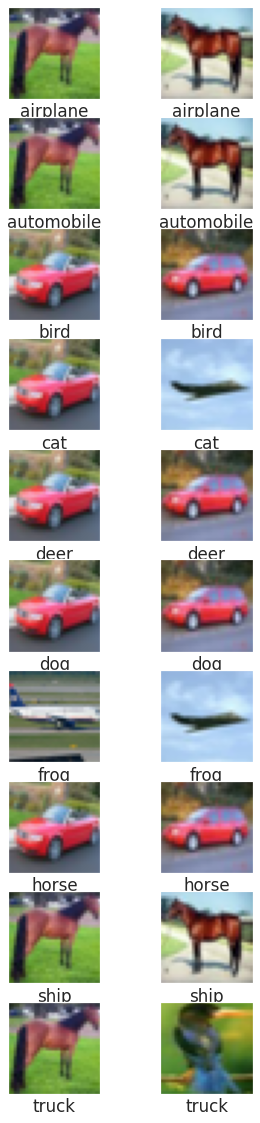

In [118]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# Analysis on how much the performance was affected by changing batch_size
We can see that as we doubled the batch size, the model is converging faster. The time taken to reach the previous levels was more quicker. But since we kept everything else same, we need to change the learning rate appropriatly as well as the the parameters for learning rate decay to converge better and faster!


## 2. Dropout: Change the position and value of dropout layer

We will change the position of the droput layer to just after the flatten layer to introduce noice in data and analyze model behavior and also reduce the value as we want lesser noise in the data

### 1. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.</li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.</li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [62]:
epochs = 30
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 64
dropout_rate = 0.2 # new change
num_classes = 10

In [63]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
layers.append(tf.keras.layers.Dropout(dropout_rate)) # new change
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.linear, kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
layers.append(tf.keras.layers.Softmax())
model = tf.keras.Sequential(layers)

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)               

### 2. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.</li>
<li>Use accuracy as a metric.</li>
</ol>

In [66]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### 3. Model Training(0.5 + 0.25 = 0.75 mark)

#### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [67]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model.fit(train_gen,epochs=100,validation_data=valid_gen, shuffle=False, callbacks=[callback])
end_time = time.time()

Epoch 1/100
625/625 [==============================] - 24s 37ms/step - loss: 2.1626 - accuracy: 0.2762 - val_loss: 1.8723 - val_accuracy: 0.3943
Epoch 2/100
625/625 [==============================] - 23s 37ms/step - loss: 1.8492 - accuracy: 0.4007 - val_loss: 1.7626 - val_accuracy: 0.4331
Epoch 3/100
625/625 [==============================] - 23s 36ms/step - loss: 1.7484 - accuracy: 0.4362 - val_loss: 1.7062 - val_accuracy: 0.4617
Epoch 4/100
625/625 [==============================] - 23s 37ms/step - loss: 1.6985 - accuracy: 0.4568 - val_loss: 1.6857 - val_accuracy: 0.4753
Epoch 5/100
625/625 [==============================] - 23s 36ms/step - loss: 1.6564 - accuracy: 0.4745 - val_loss: 1.6662 - val_accuracy: 0.4743
Epoch 6/100
625/625 [==============================] - 23s 37ms/step - loss: 1.6311 - accuracy: 0.4850 - val_loss: 1.6682 - val_accuracy: 0.4770
Epoch 7/100
625/625 [==============================] - 23s 37ms/step - loss: 1.6078 - accuracy: 0.4960 - val_loss: 1.6497 - val_ac

#### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

Text(0, 0.5, 'accuracy')

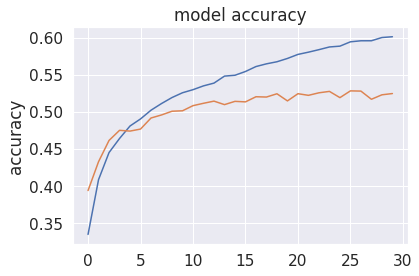

In [74]:
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

In [75]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 691.04s


### 4. Model Evaluation(0.5 + 0.5 = 1 mark)

#### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [76]:
train_predicted = model.predict(train_gen)
valid_predicted = model.predict(valid_gen)

In [77]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [78]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [79]:
print("Train Accuracy: {}%".format(round(accuracy_score(train_actual_cls, train_predicted_cls)*100.0, 2)))
print("Validation Accuracy: {}%".format(round(accuracy_score(valid_actual_cls, valid_predicted_cls)*100.0,2)))

Train Accuracy: 61.27%
Validation Accuracy: 52.56%


In [80]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls, normalize='true')

In [81]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

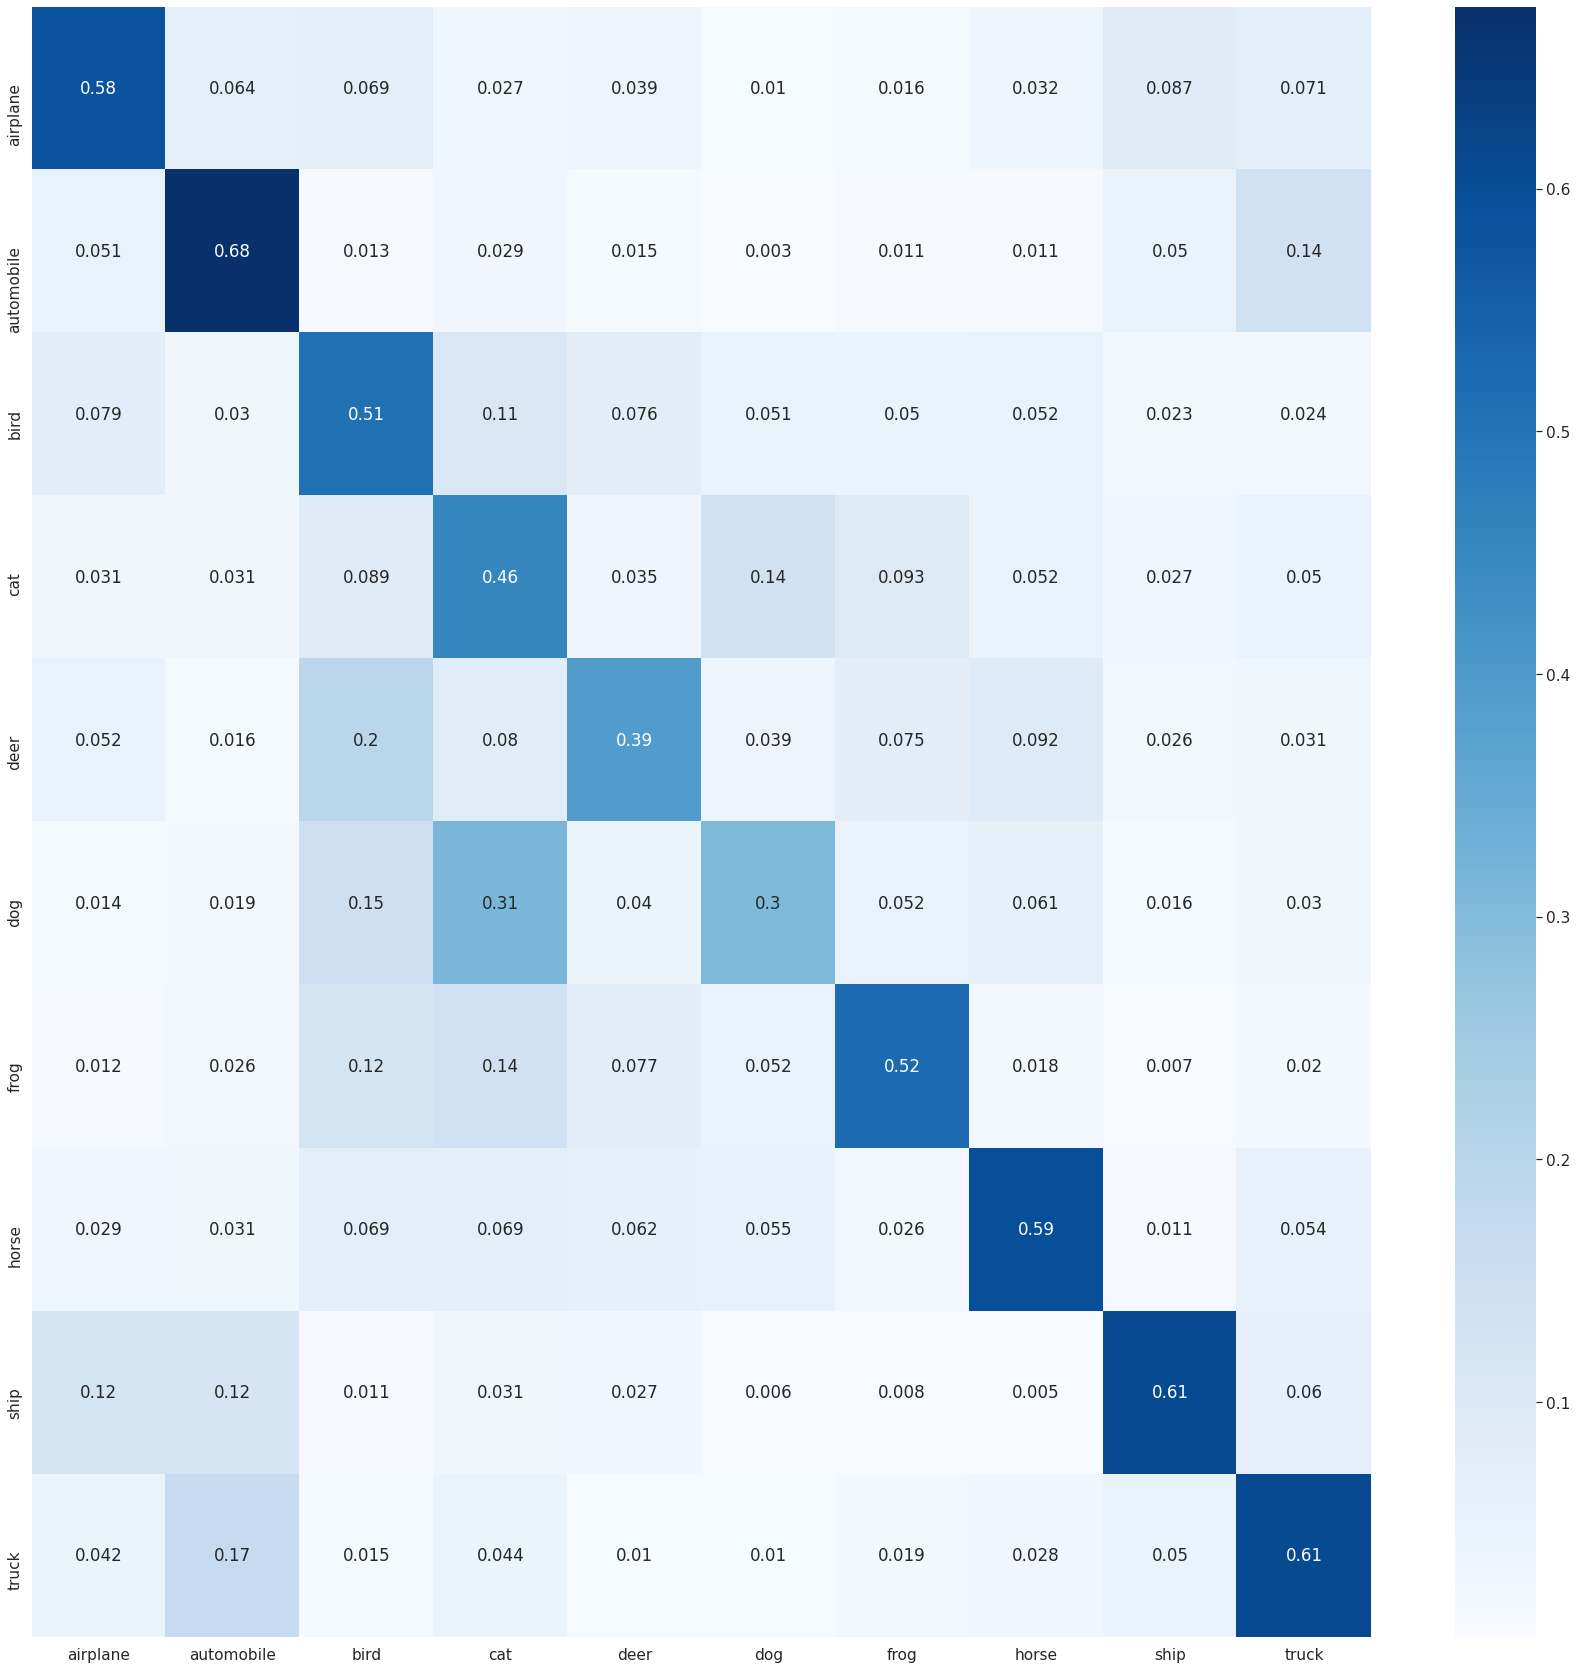

In [82]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

### Analysis of Heatmap
For the validation dataset, amongst the classes, model has learnt to classify automobile better than other classes as it could identify ~69% of automobile data in validation set, the next best are ship and truck. The worst classified class is dog, amongst the dog images present in validation set, it has properly classified only ~30% of them. It has mostly classified dogs as cats which is totally wrong! 

#### b. Print the two most incorrectly classified images for each class in the test dataset.

In [83]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [84]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [85]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


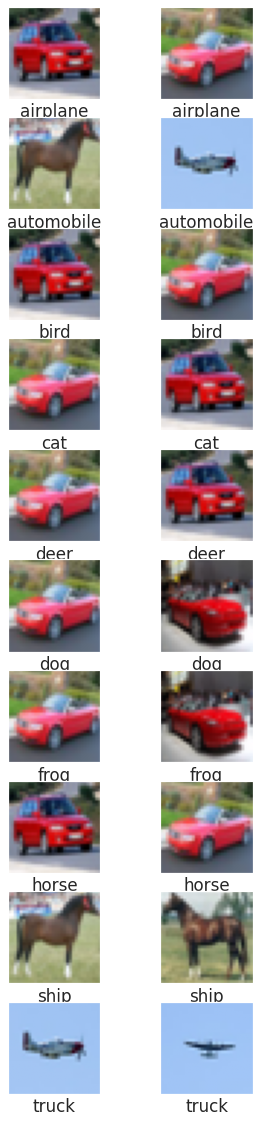

In [86]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# Analysis of moving the dropout layer
By introducing the noise in data, we would ideally like to see if data is being modeled better but since the model is getting highly overfit, the purpose of moving the dropout is not achieved. It can be better to have more than one dropout layers. In general, it is better to have dropout layers after having layer with non-linear activation functions!

# References


1. Sashank J. Reddi, Satyen Kale, & Sanjiv Kumar. (2019). On the Convergence of Adam and Beyond.
2. Srivastava, Nitish, Geoffrey, Hinton, Alex, Krizhevsky, Ilya, Sutskever, and Ruslan, Salakhutdinov. "Dropout: A Simple Way to Prevent Neural Networks from Overfitting".J. Mach. Learn. Res. 15, no.1 (2014): 1929–1958.
3. "Is Dropout Applied before or after the Non-linear Activation Function?" Dr. Sebastian Raschka. May 19, 2021. Accessed May 23, 2021. https://sebastianraschka.com/faq/docs/dropout-activation.html.   
4. Franck DernoncourtFranck Dernoncourt "Where Should I Place Dropout Layers in a Neural Network?" Cross Validated. June 01, 1965. Accessed May 23, 2021. https://stats.stackexchange.com/questions/240305/where-should-i-place-dropout-layers-in-a-neural-network.
5. Galeone, Paolo. "Analysis of Dropout." P. Galeone's Blog. Accessed May 23, 2021. https://pgaleone.eu/deep-learning/regularization/2017/01/10/anaysis-of-dropout/.
6. Shen, Kevin. "Effect of Batch Size on Training Dynamics." Medium. June 19, 2018. Accessed May 23, 2021. https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e.


